# Bank Marketing Analysis

Created on Mon Jun 10 14:39:29 2019

@author: Anshu Pandey


In [4]:
# importing the packages 
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
# setting up pandas backend to show upto 20 columns while exploring a dataframe
pandas.set_option("max_columns",20)

In [5]:
# load the dataset
url = "https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/Bank_marketing.csv"
df = pandas.read_csv(url,sep=';') # as dataset is ; separated, here we are using sep=';'
#check the shape of data
df.shape

(41188, 21)

In [7]:
# to understand the dataset structure and see top 5 rows, we are using here df.head()
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


### Data Cleaning

In [8]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# As it can be seen that the dataset doesn't have missing values for any of its columns, we are good
# to go ahead for next step of data cleaning.

In [10]:
# check for duplicates
df.duplicated().sum()

12

In [6]:
#As the data does not have identifiers, it may be possible
#that there may be customers with similar properties which may coexist.
#So we will not drop the duplicates


In [5]:
# analyse the data - df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [11]:
# to make sure that missing values do not exist in the form of tokens like ".","-","?","not_available" etc.
# analysing unique values in categorical columns
cat=['job','marital','education','default','housing','loan',
       'contact','month','day_of_week','poutcome']

In [12]:
for i in cat:
    print(i," : ",df[i].unique(),"\n")

job  :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital  :  ['married' 'single' 'divorced' 'unknown'] 

education  :  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default  :  ['no' 'unknown' 'yes'] 

housing  :  ['no' 'yes' 'unknown'] 

loan  :  ['no' 'yes' 'unknown'] 

contact  :  ['telephone' 'cellular'] 

month  :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week  :  ['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome  :  ['nonexistent' 'failure' 'success'] 



In [9]:
# the categorical features does not contain any token to  represent the missing values


### Data Exploration and Feature Selection

In [8]:
# analysis of variation
df.std()/df.mean()

age                0.260375
duration           1.003849
campaign           1.078837
pdays              0.194198
previous           2.861312
emp.var.rate      19.184834
cons.price.idx     0.006186
cons.conf.idx     -0.114269
euribor3m          0.478958
nr.employed        0.013983
dtype: float64

##### observation
emp.var.rate - more informative
<br>
cons.price.idx = less informative


In [9]:
# analysis of skewness
df.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

highly skewed features - duration, campaign, previous
and pdays.


In [13]:
# analyse categorical features
out = df.describe(include="object")
out

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


poutcome, loan and default cols are not 
much informative, so we may consider to drop
these feature based on further analysis


In [14]:
# analyse the continuous features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


features - previous and pdays does not contain
much information as more than 75% of values are
commonly occuring values.


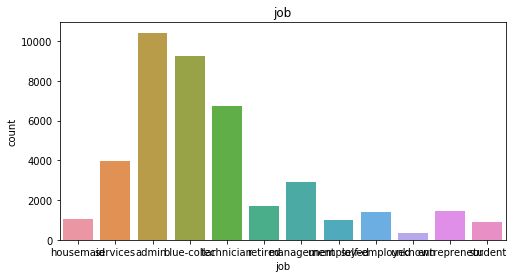

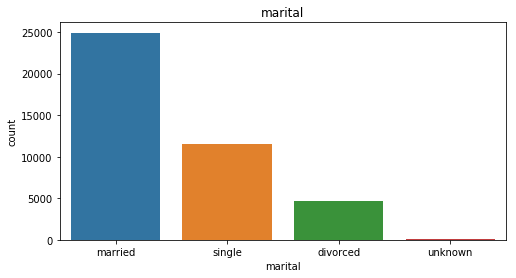

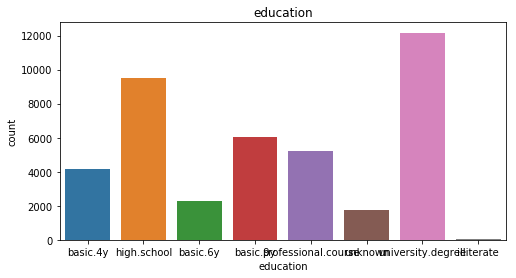

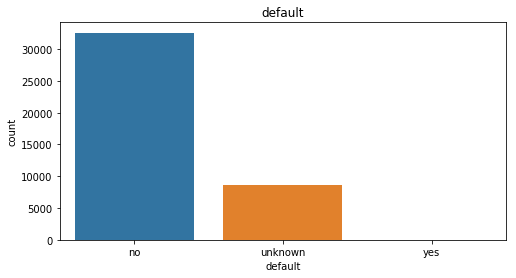

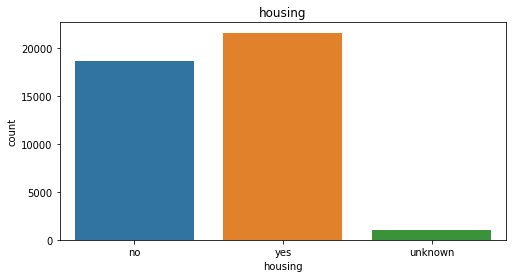

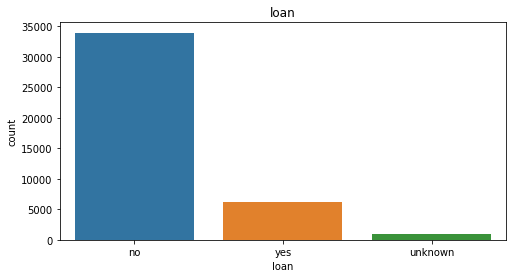

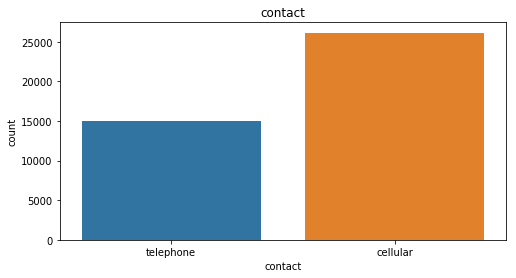

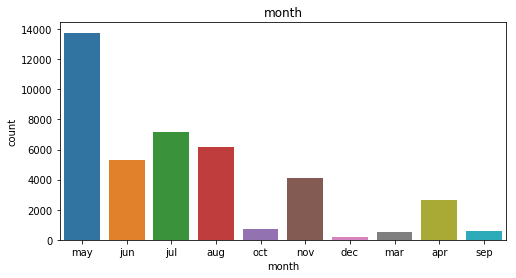

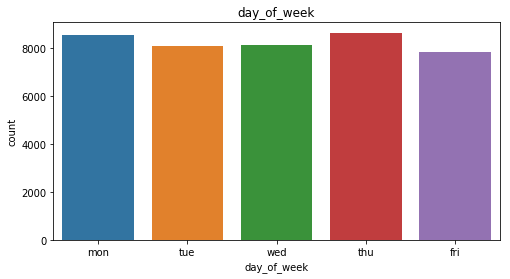

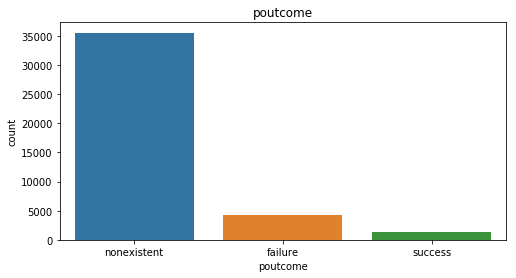

In [20]:
# Data Visualization 
# univariate data visualization
for i in cat:
    plt.figure(figsize=(8,4))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()


not relevant features - default, loan, poutcome

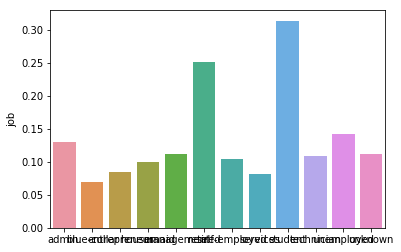

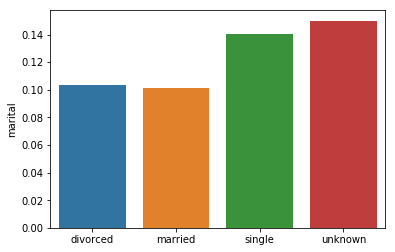

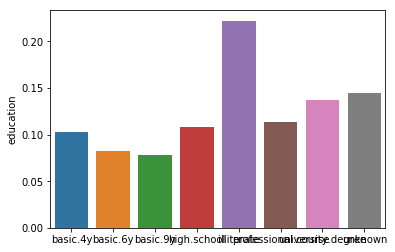

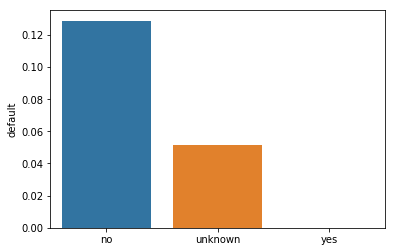

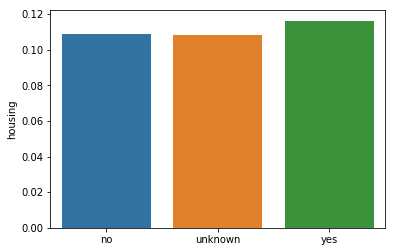

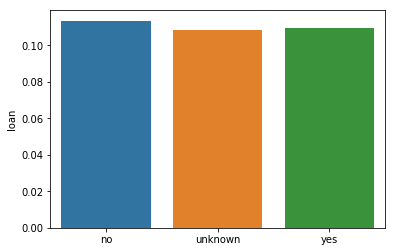

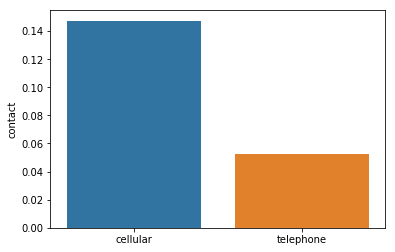

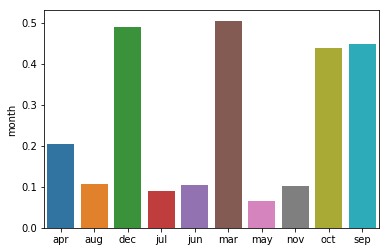

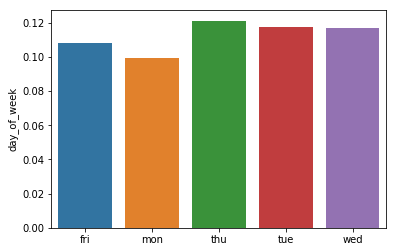

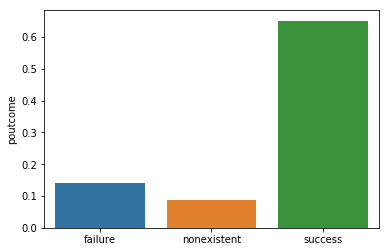

In [21]:
# bivariate data visualization
# AS label is categorical variable
# for categorical features
for i in cat:
    y = df[df['y']=="yes"].groupby([i])[i].count()
    y = y / df.groupby([i])[i].count()
    x = list(y.index)
    sns.barplot(x,y)
    plt.show()


not important - default, housing, loan, day_of_week

In [15]:
# for continuous features
con = ["age","duration","campaign","pdays","previous",
       'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']


C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


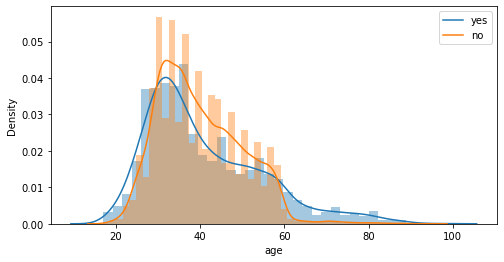

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


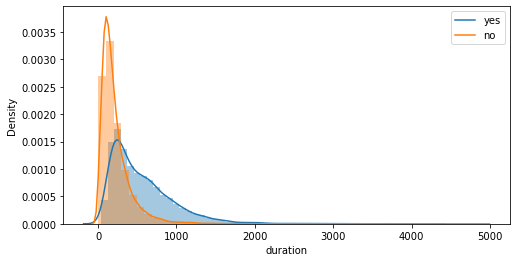

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


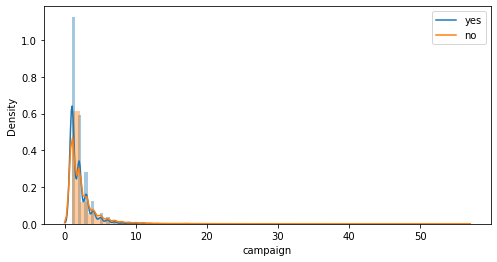

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


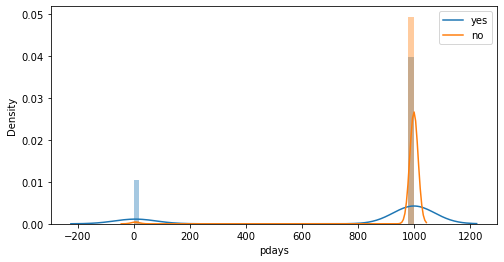

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


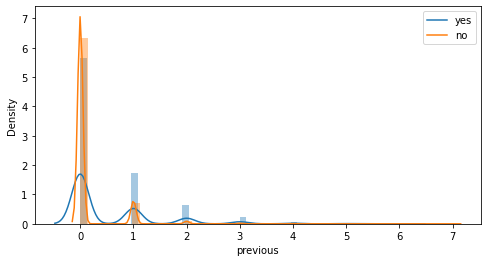

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


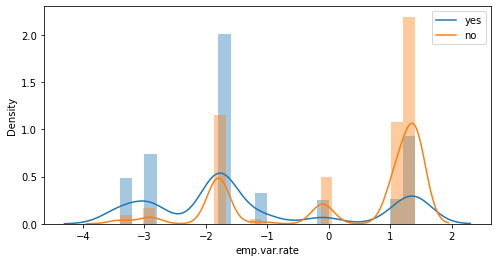

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


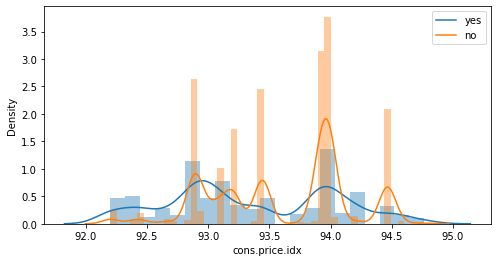

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


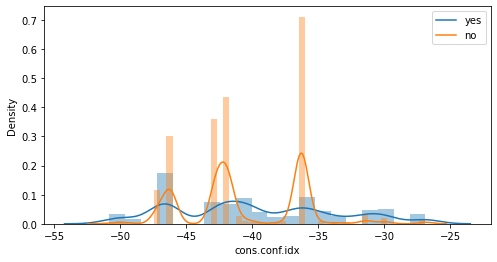

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


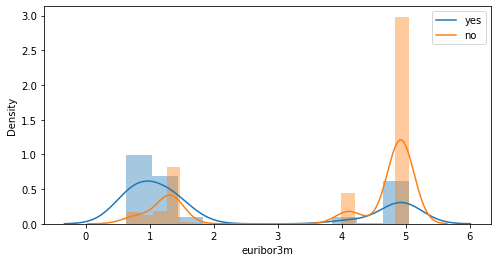

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anshu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


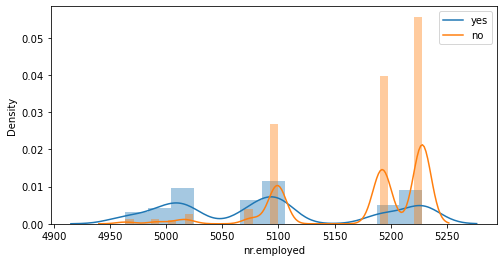

In [16]:
for i in con:
    plt.figure(figsize=(8,4))
    sns.distplot(df[i][df['y']=='yes'])
    sns.distplot(df[i][df['y']=='no'])
    plt.legend(['yes','no'])
    plt.show()


not important - pdays, previous

In [17]:
# Feature selection
# labelencode the target
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['y'] = le1.fit_transform(df['y'])


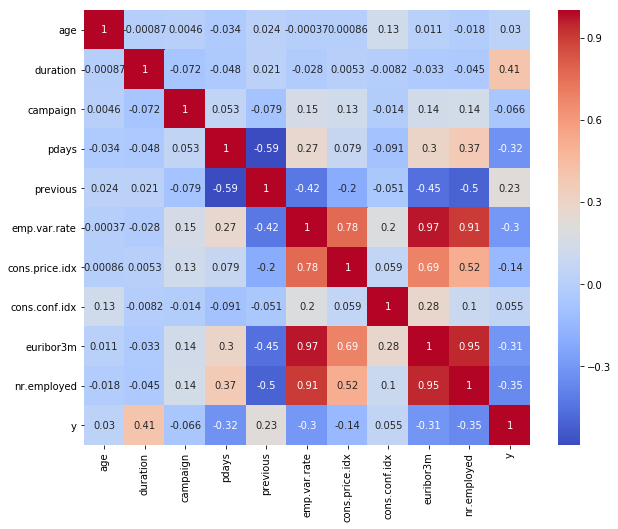

In [25]:
# correlation analysi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


not important - age, campaign, cons.conf.idx
linearly important - duration, pdays, previous
emp.var.rate, cons.price.idx, euribor3m, ne.employed


In [33]:
# ANOVA for continuous features
x= df[con]
y = df['y']
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
fval, pval = f_classif(x,y)

for i in range(len(con)):
    print(con[i]," : ",pval[i])

age  :  6.802136418555567e-10
duration  :  0.0
campaign  :  2.0077799905178344e-41
pdays  :  0.0
previous  :  0.0
emp.var.rate  :  0.0
cons.price.idx  :  9.318964780953155e-170
cons.conf.idx  :  7.536664996185313e-29
euribor3m  :  0.0
nr.employed  :  0.0


C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
# Chi Square Analysis
from sklearn.feature_selection import chi2
for i in cat:
    x = pandas.get_dummies(df[i])
    chival,pval = chi2(x,y)
    print(i, x.columns,pval.round(3))
    print("")


job Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object') [0.    0.    0.001 0.193 0.935 0.    0.352 0.    0.    0.254 0.003 0.976]

marital Index(['divorced', 'married', 'single', 'unknown'], dtype='object') [0.042 0.    0.    0.291]

education Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype='object') [0.038 0.    0.    0.185 0.141 0.849 0.    0.   ]

default Index(['no', 'unknown', 'yes'], dtype='object') [0.    0.    0.537]

housing Index(['no', 'unknown', 'yes'], dtype='object') [0.096 0.649 0.1  ]

loan Index(['no', 'unknown', 'yes'], dtype='object') [0.663 0.649 0.404]

contact Index(['cellular', 'telephone'], dtype='object') [0. 0.]

month Index(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], dtype='object') [0. 

not important - default, housing, loan, day_of_week
very impo = contact

In [35]:
########### mutual information analysis
from sklearn.feature_selection import mutual_info_classif

# for continuous features
x= df[con]
x = StandardScaler().fit_transform(x)
mval = mutual_info_classif(x,y)
for i in range(len(con)):
    print(con[i],mval[i])


C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


age 0.01347974085286796
duration 0.07772614440675651
campaign 0.003961351356527976
pdays 0.0337983577285792
previous 0.020517111258382847
emp.var.rate 0.055977830899093695
cons.price.idx 0.069886790626015
cons.conf.idx 0.0682400107348986
euribor3m 0.07377932634772888
nr.employed 0.0633177229775237


In [36]:
# for categorical

for i in cat:
    x = pandas.get_dummies(df[i])
    mval = mutual_info_classif(x,y)
    print(i, x.columns,mval.round(3))
    print("")

job Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object') [0.001 0.001 0.001 0.    0.002 0.001 0.    0.001 0.002 0.    0.    0.   ]

marital Index(['divorced', 'married', 'single', 'unknown'], dtype='object') [0.    0.003 0.004 0.   ]

education Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype='object') [0.    0.001 0.    0.002 0.001 0.002 0.001 0.   ]

default Index(['no', 'unknown', 'yes'], dtype='object') [0.01  0.004 0.   ]

housing Index(['no', 'unknown', 'yes'], dtype='object') [0.003 0.    0.002]

loan Index(['no', 'unknown', 'yes'], dtype='object') [0.006 0.    0.   ]

contact Index(['cellular', 'telephone'], dtype='object') [0.014 0.015]

month Index(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], dtype='object'

less important - age, campaign, previous
important  - contact, poutcome


In [18]:
# getting final data
final = ['job','marital','education','contact',
         'month','duration','pdays','previous',
         'poutcome',
         'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y']
df = df[final]

In [19]:
# separate the features and label
x = df.drop(['y'],axis=1)
y = df['y']

In [20]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  object 
 1   marital         41188 non-null  object 
 2   education       41188 non-null  object 
 3   contact         41188 non-null  object 
 4   month           41188 non-null  object 
 5   duration        41188 non-null  int64  
 6   pdays           41188 non-null  int64  
 7   previous        41188 non-null  int64  
 8   poutcome        41188 non-null  object 
 9   emp.var.rate    41188 non-null  float64
 10  cons.price.idx  41188 non-null  float64
 11  cons.conf.idx   41188 non-null  float64
 12  euribor3m       41188 non-null  float64
 13  nr.employed     41188 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 4.4+ MB


In [28]:
# get the categorical features
# xcat = x[x.columns[[0,1,2,3,4,8]]]
xcat = x.select_dtypes(include=["object"])
# xcont = x[x.columns[[5,6,7,9,10,11,12,13]]]
xcont = x.select_dtypes(include=["int64","float64"])
xcat.head()

,job,marital,education,contact,month,poutcome
0,housemaid,married,basic.4y,telephone,may,nonexistent
1,services,married,high.school,telephone,may,nonexistent
2,services,married,high.school,telephone,may,nonexistent
3,admin.,married,basic.6y,telephone,may,nonexistent
4,services,married,high.school,telephone,may,nonexistent


In [29]:
# scaling the continuous features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xcont = sc.fit_transform(xcont)

# one hot encode the categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[0,1,2,3,4,5])],remainder='passthrough')

#ohe= OneHotEncoder(categorical_features="all")
xcat = transformer.fit_transform(xcat).toarray()


# merging the categorical and continuous features

x = numpy.concatenate([xcat,xcont],axis=1)

In [30]:
# train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,stratify = y)


## 6. Applying ML

In [31]:
# logistic Regression - Normal Equation way
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtr,ytr)



from sklearn import metrics
ypred = model.predict(xts)
creport = metrics.classification_report(yts,ypred)
print(creport)
model.score(xts,yts)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.69      0.43      0.53       928

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



C:\Users\anshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9135712551590192

In [46]:
## Gradient Descent Approac
model2 = LogisticRegression(penalty='l1',tol=1e-6)
model2.fit(xtr,ytr)
ypred2 = model2.predict(xts)
creport = metrics.classification_report(yts,ypred2)
print(creport)
model2.score(xts,yts)

C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.65      0.43      0.52       928

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



0.9095654285020636

In [47]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=15,
                                min_samples_leaf=5,
                                min_samples_split=10,
                                max_leaf_nodes=30)
model3.fit(xtr,ytr)
ypred3 = model3.predict(xts)
creport = metrics.classification_report(yts,ypred3)
print(creport)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7310
           1       0.61      0.61      0.61       928

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.78      0.78      0.78      8238
weighted avg       0.91      0.91      0.91      8238



In [48]:
model3.score(xts,yts)

0.9122359796067007

In [49]:
# recall for train data
metrics.recall_score(ytr,model3.predict(xtr))

0.6258081896551724

In [50]:
# recall for test data
metrics.recall_score(yts,model3.predict(xts))


0.6056034482758621

In [ ]:
# performing grid search for best params
params = {"max_depth":numpy.arange(5,20,2),
          "min_samples_leaf":numpy.arange(5,100,10),
          "min_samples_split":numpy.arange(10,200,20),
          "max_leaf_nodes":numpy.arange(10,50,5)}

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(DecisionTreeClassifier(),param_grid=params,
                      scoring='recall',n_jobs =-1,cv=3,verbose=True)
search.fit(x,y)

In [51]:
from sklearn.pipeline import Pipeline

class preprocess:
    def fit(self,x,y=None):
        self.xcat = x.select_dtypes(include=["object"])
        self.xcont = x.select_dtypes(include=["int64","float64"])
        self.ohe = OneHotEncoder(categorical_features="all")
        self.ohe.fit(self.xcat)
        self.sc = StandardScaler()
        self.sc.fit(self.xcont)
        return self
    def transform(self,x,y=None,onehot=True,scale=True):
        self.xcat = x.select_dtypes(include=["object"])
        self.xcont = x.select_dtypes(include=["int64","float64"])
        if onehot==True:
            self.xcat = self.ohe.transform(self.xcat).toarray()
        if scale==True:
            self.xcont = self.sc.transform(self.xcont)
        x = numpy.concatenate([self.xcat,self.xcont],axis=1)
        return x
    def fit_transform(self,x,y=None):
        self.fit(x,y)
        x = self.transform(x)
        return x


In [52]:
final_pipeline = Pipeline([('ppr',preprocess()),
                           ("model",DecisionTreeClassifier(max_depth=10,min_samples_leaf=20,
                                                           max_leaf_nodes=10,min_samples_split=30))])
x = df.drop(['y'],axis=1)
final_pipeline.fit(x,y)


C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
C:\Users\anshu\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


Pipeline(memory=None,
     steps=[('ppr', <__main__.preprocess object at 0x00000290B65AF470>), ('model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [53]:
from sklearn.externals import joblib
joblib.dump(final_pipeline,"final_model.pkl")

['final_model.pkl']

In [55]:
final_pipeline.predict(x.iloc[0:2,:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


array([0, 0])